## SYRIA TEL CUSTOMER CHURN PROJECT

Final Project Submission

Students Name: Silvia Gworit

Student pace: Full time Hybrid

Instructor name: Maryann Mwikali


## BUSINESS UNDERSTANDING

## Project Overview

Syria Tel is a telecommunications company that is looking to optimize their resources and improve customer retention. Customer churn is when a customer leaves/discontinues their service with SyriaTel. Due to limited resources, they would like to focus their efforts on customers that are less likely to churn while still trying to retain customers who are likely to churn. This project aims to analyze a telecommunications dataset and develop a predictive model that determines if a customer will churn or not.

## Business Problem

Syria Tel has noticed a number of customers churn from the company. The company looks to improve the customer retention and would like to be able to  determine if a customer is likely to churn from the company or not so as to know where to make improvements and where to allocate their resources effectively.

## Proposed Solution

To build a predictive model that will be able to predict given certain features, the customers who are likely to churn and those who are not.
This will help with coming up with strategies to retain the at risk customers and maximize their resources to improve services provided to customers who are less likely to churn.

## DATA UNDERSTANDING
Our data is churn in telecom dataset

Our data has 5 rows × 23 columns

Our data gives information about the customers account and its features

link: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

## Columns

1.CustomerID: Unique identifier for each customer.

2.AccountLength: The length of time the customer has been with SyriaTel.

3.InternationalPlan: If the customer has an international calling plan or not.

4.VoiceMailPlan: If the customer has a voicemail plan or not.

5.NumberVmailMessages: The number of voicemail messages received by the customer.

6.TotalDayMinutes: Total number of minutes the customer used during the day.

7.TotalEveMinutes: Total number of minutes the customer used during the evening.

8.TotalNightMinutes: Total number of minutes the customer used during the night.

9.TotalIntlMinutes: Total number of international minutes used by the customer.

10.TotalDayCalls: Total number of calls made by the customer during the day.

11.TotalEveCalls: Total number of calls made by the customer during the evening.

12.TotalNightCalls: Total number of calls made by the customer during the night.

13.TotalIntlCalls: Total number of international calls made by the customer.

14.CustomerServiceCalls: Number of customer service calls made by the customer.

15.Churn: Binary indicator of whether the customer churned or not.

## DATA PREPARATION

In [38]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [41]:
df.shape

(3333, 21)

DATA CLEANING

In [43]:
# check for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [45]:
#checking for duplicates
df.duplicated().sum()

0

Our data has no duplicates or missing values

EXPLORATORY DATA ANALYSIS

In [47]:
categorical_columns = [ 'international plan', 'voice mail plan','churn']

numerical_columns = ['number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes','total eve calls','total eve charge',
                'total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

1. Univariate Analysis

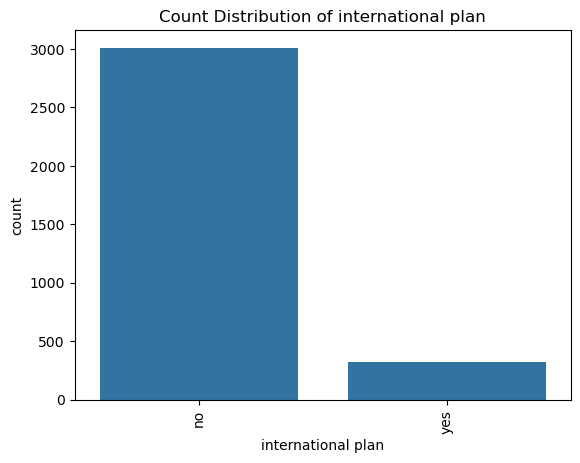

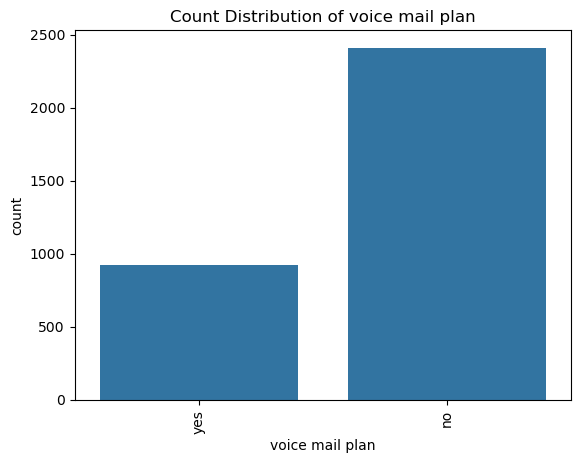

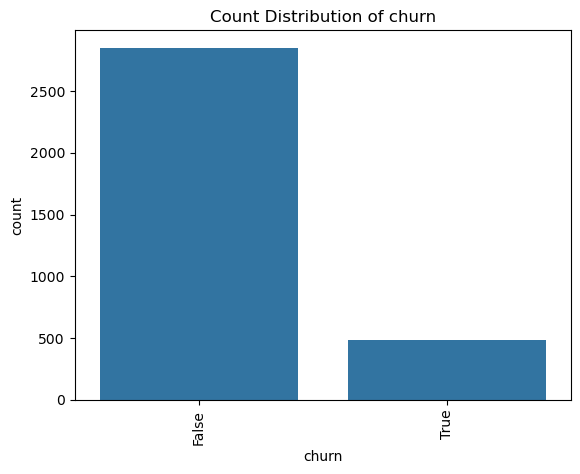

In [50]:
for col in categorical_columns:
    plt.figure()
    
    ax = sns.countplot(data = df, x= col)
    ax.set_title(f'Count Distribution of {col}')
    plt.xticks(rotation= 90)

plt.show()
